In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab
from pylab import rcParams

In [2]:
df_blocking_01  = pd.read_csv('../20181209_interval_abi_00010/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_1   = pd.read_csv('../20181209_interval_abi_00100/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_100 = pd.read_csv('../20181209_interval_abi_10000/result.csv', names = ('load', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [3]:
for index, row in df_blocking_01.iterrows():
    df_blocking_01.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_1.iterrows():
    df_blocking_1.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_100.iterrows():
    df_blocking_100.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]

In [4]:
df_blocking_01   = df_blocking_01 .replace(0, np.nan)
df_blocking_1    = df_blocking_1.replace(0, np.nan)
df_blocking_100  = df_blocking_100.replace(0, np.nan)

In [12]:
df_blocking_01

,load,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,60,0.0037,0.0001,NaN,NaN,NaN
1,70,0.0157,0.0008,0.0009,NaN,NaN
2,80,0.0383,0.0061,0.0071,NaN,NaN
3,90,0.0664,0.0190,0.0211,NaN,NaN
4,100,0.0952,0.0422,0.0433,NaN,NaN
5,110,0.1259,0.0713,0.0697,NaN,NaN
6,120,0.1448,0.0940,0.0943,NaN,NaN
7,130,0.1782,0.1283,0.1225,NaN,NaN
8,140,0.1989,0.1499,0.1489,NaN,NaN
9,150,0.2249,0.1790,0.1754,NaN,NaN


In [10]:
plt.clf()
pylab.figure(figsize=(7, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['savefig.bbox'] = 'tight'

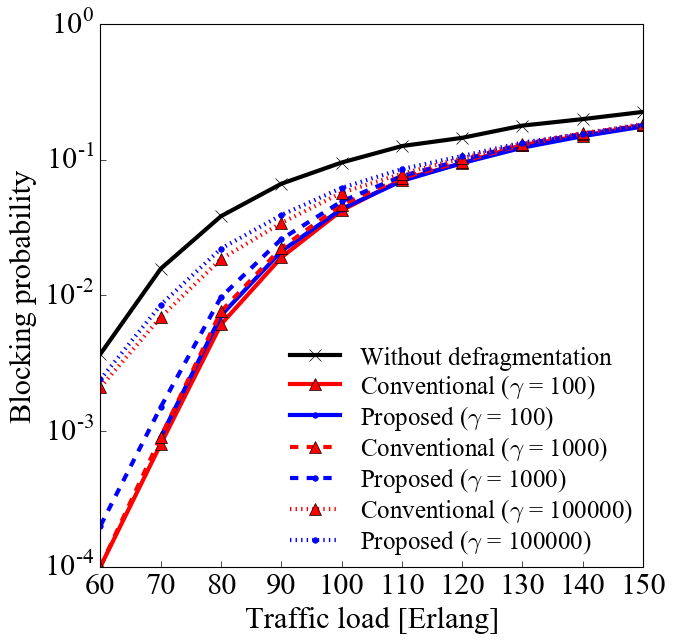

In [11]:
plt.yscale("log")
plt.minorticks_off()
plt.plot(df_blocking_01['load'], df_blocking_01['Without defragmentation'], marker='x',  color="black")

plt.plot(df_blocking_01['load'], df_blocking_01['Conventional'], label=('Conventional (' + r'$\gamma$' + ' = 100)'), marker='^',  color="red")
plt.plot(df_blocking_01['load'], df_blocking_01['Proposed'], label=('Proposed (' + r'$\gamma$' + ' = 100)'), marker='.',  color="blue")

plt.plot(df_blocking_1['load'], df_blocking_1['Conventional'], label=('Conventional (' + r'$\gamma$' + ' = 1000)'), marker='^',  color="red", linestyle='--')
plt.plot(df_blocking_1['load'], df_blocking_1['Proposed'], label=('Proposed (' + r'$\gamma$' + ' = 1000)'), marker='.',  color="blue", linestyle='--')

plt.plot(df_blocking_100['load'], df_blocking_100['Conventional'], label=('Conventional (' + r'$\gamma$' + ' = 100000)'), marker='^',  color="red", linestyle=':')
plt.plot(df_blocking_100['load'], df_blocking_100['Proposed'], label=('Proposed (' + r'$\gamma$' + ' = 100000)'), marker='.',  color="blue", linestyle=':')

plt.xlim(60, 150)
plt.yticks([1,0.1, 0.01,0.001, 0.0001])

plt.xlabel("Traffic load [Erlang]") # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend(loc="lower right")
plt.savefig("../../sawa_paper/sawa/20181101_journal_sawa/fig/span_net11.pdf")
plt.show()
plt.close()